# 探索的データ分析とは

データ分析のアプローチは仮説をデータで検証する「仮説検証型」とデータから仮説を生み出す「探索型」の2つがある。  
二つを行き来しつつ知見を見出していく。  


データ解析には検証すべき仮説（目的）を設定することが必要だが、仮説を持てない場合も多いので、まず仮説を作る為にデータ解析をする必要がある。  
そこで探索的データ分析を行う。

# 探索的データ解析の基礎概念

探索的データ解析を行うにあたって意識する3つの概念がある。

**可視化**  
データの性質や傾向が不明であるという前提に立ち、可視化に重点を置く  
よく使う手法はヒストグラム(比較対象が少ない場合)、箱ひげ図(比較対象が多い場合)、散布図など  

**再表現**  
データに何らかの変換や計算を用いて理解しやすくしたり、違った側面から見られるようにする  
データや目的によっては不適切な手法適用もあるので注意が必要

**抵抗性**  
統計量などが外れ値に影響されにくい性質  
データが想定している性質に沿わない時にどれくらい影響されにくいかという**頑健性**も大事

# 探索的データ解析の基本的な取り組み方

上記基礎概念を元に、次の6つのアプローチを行う。  

1. **データの分布を見る**  
分布を把握することで、正しい現状認識が可能になり、曖昧な認識を補強したり想定とのズレを修正することが出来る  
複数の図を比較することもある  
得られた知見の原因を考えることで仮説を立てていく  
よく使う手法はヒストグラムや箱ひげ図  

2. **データとの関係性を見る**  
変数間の関係を把握することで、目的変数にどの変数がどの程度影響を及ぼしているのかを知ることが出来る  
想定する変数が影響を与えているか、他の変数が影響していないか、また変数同士の優先順位を確認する  
よく使う手法は散布図や相関分析  

3. **データを縮約する**  
**データ縮約**という  
データの平均や合計を出すことで特徴や傾向を一目で読み取れるようにする  

4. **データを層別にする**  
**スライシング**という  
データを様々な軸の水準で区切り、層別にすることで、意味付けした各層ごとにデータの特徴を把握することが出来る  
ヒストグラムが一つの変数の把握に用いるのに対し、スライシングは一つの変数を軸に他の変数がどうなるかを把握する  

5. **データを詳細化する**  
**ドリルダウン**という  
データを様々な軸で詳細化することで、全体と部分との比較をすることができる  

6. **データを時系列で見る**  
データを時系列で並べてその変化を見ることで、時系列の変化を把握する  
よく使う手法は折れ線グラフ  

# 可視化手法

データを可視化する様々な方法と用途をまとめる。

In [14]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display

sns.set_context('talk')
pd.set_option('display.max_colwidth', 0)
sns.set_style('darkgrid')
plt.rcParams['font.family'] = 'IPAPGothic'
plt.rcParams['font.size'] = 18

%matplotlib inline

In [15]:
# 今回使うサンプルデータ
iris=sns.load_dataset("iris")

In [17]:
display(iris.head())

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 大きさの比を見る: 棒グラフ

各項目の大きさを比べるのに使う。  
比の関係を知りたいので、縦軸の値の一部を省略してはいけない。  

In [24]:
data = iris.groupby(by=["species"], as_index=False)[["species", "sepal_length"]].mean()
data

,species,sepal_length
0,setosa,5.006
1,versicolor,5.936
2,virginica,6.588


<Container object of 3 artists>

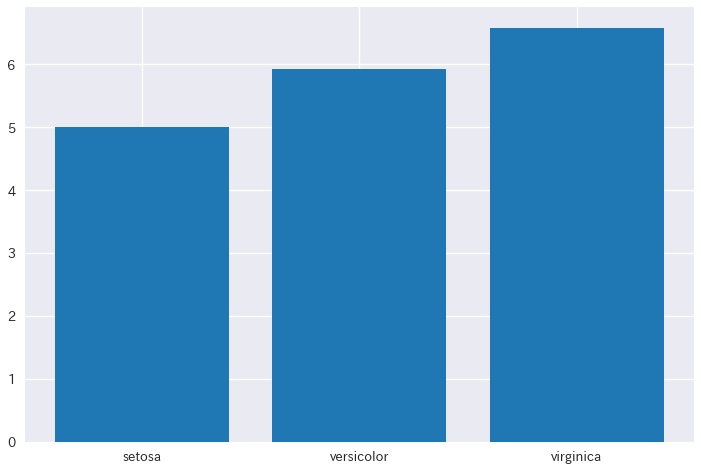

In [35]:
data = iris.groupby(by=["species"], as_index=False)[["species", "sepal_length"]].mean()

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax.bar(x=data.species, height=data.sepal_length)

## 分布を見る: ヒストグラム/箱ひげ図

データの特徴を把握するのに使う。  
例えば、データにどの程度バラツキがあるのか、どの範囲にデータが集まっているのか、ある範囲のデータの個数はどの程度か、などが挙げられる。  
ヒストグラムは比較対象が少ない場合、箱ひげ図は比較対象が多い場合に用いる。  
ヒストグラムが多峰な場合、クラスタリングの必要があることがわかる。  

(array([  0.,   5.,  11.,  25.,  11.,  21.,  10.,  16.,  21.,  13.,   6.,
          5.,   5.,   1.]),
 array([ 4.        ,  4.28571429,  4.57142857,  4.85714286,  5.14285714,
         5.42857143,  5.71428571,  6.        ,  6.28571429,  6.57142857,
         6.85714286,  7.14285714,  7.42857143,  7.71428571,  8.        ]),
 <a list of 14 Patch objects>)

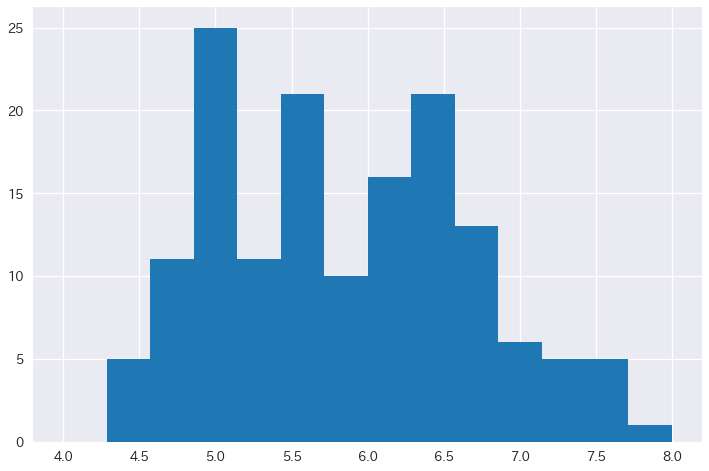

In [64]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax.hist(x=iris["sepal_length"], bins=14, range=(4, 8))

分布が多峰になっているので、class毎に分割してみる

In [ ]:
# 行→列はpd.pivot
# pivotするデータの準備。Species (列にする値) と variable (行にする値) の組がユニークでないとダメ。
unpivot = melted.groupby(['Species', 'variable']).sum()
unpivot = unpivot.reset_index()
unpivot.pivot(index='variable', columns='Species', values='value')

In [78]:
iris.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [84]:
data

,sepal_length,sepal_length,sepal_length
0,5.1,7.0,6.3
1,4.9,6.4,5.8
2,4.7,6.9,7.1
3,4.6,5.5,6.3
4,5.0,6.5,6.5
5,5.4,5.7,7.6
6,4.6,6.3,4.9
7,5.0,4.9,7.3
8,4.4,6.6,6.7
9,4.9,5.2,7.2


In [89]:
x = np.random.normal(1, 2, 5000)
y = np.random.normal(-1, 3, 5000)
data = np.vstack([x, y]).T

In [90]:
data

array([[ 4.11974662, -0.4165884 ],
       [ 1.75395264, -2.81814419],
       [-0.54138757, -3.63851911],
       ..., 
       [ 4.40970836, -0.31292246],
       [-0.30796504, -6.04058976],
       [ 0.96888766, -6.15603656]])

In [92]:
# Make a multiple-histogram of data-sets with different length.
x_multi = [np.random.randn(n) for n in [10000, 5000, 2000]]
x_multi

[array([ 0.69521348,  1.46769746,  0.34799288, ...,  0.35962508,
        -1.61756127, -2.91708022]),
 array([-0.62157512,  2.1892364 ,  0.5055775 , ...,  2.16108142,
        -0.86854659, -0.45993982]),
 array([ 0.9479768 , -0.79379083, -2.19773727, ...,  0.30333569,
         0.79200912, -0.72832992])]

In [93]:
tmp = np.array(iris.loc[iris["species"]=="setosa", "sepal_length"])

In [96]:
tmp2 = np.array(iris.loc[iris["species"]=="versicolor", "sepal_length"])

In [98]:
tmp3 = [tmp, tmp2]

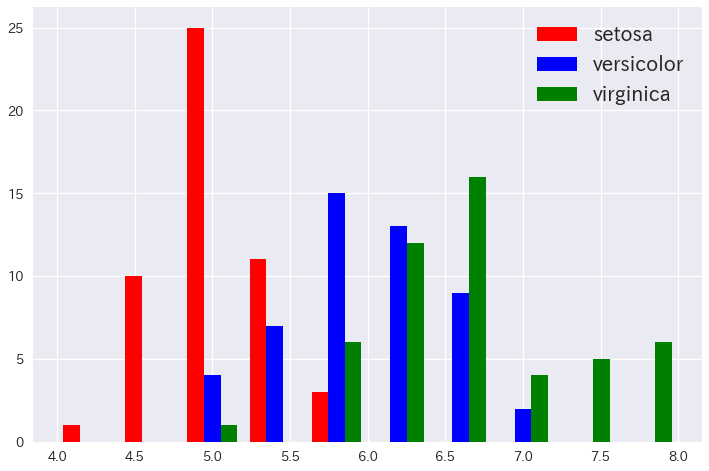

In [104]:
data = [np.array(iris.loc[iris["species"]=="setosa", "sepal_length"]),
        np.array(iris.loc[iris["species"]=="versicolor", "sepal_length"]),
        np.array(iris.loc[iris["species"]=="virginica", "sepal_length"])]

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax.hist(x=data, color=["red", "blue", "green"], bins=10, label=["setosa", "versicolor", "virginica"], range=(4, 8))
ax.legend(prop={'size': 20})

(array([  0.,   0.,   1.,   0.,   6.,  12.,  16.,   4.,   5.,   6.]),
 array([ 4. ,  4.4,  4.8,  5.2,  5.6,  6. ,  6.4,  6.8,  7.2,  7.6,  8. ]),
 <a list of 10 Patch objects>)

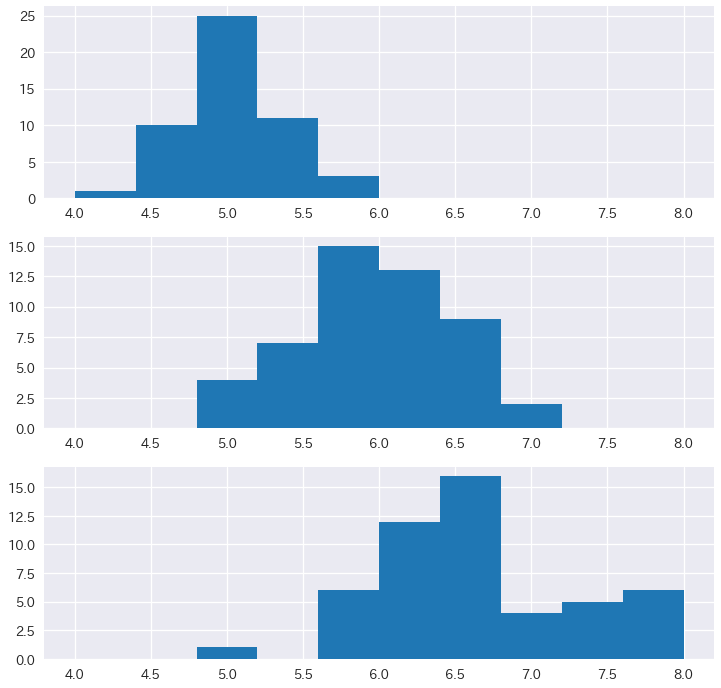

In [62]:
fig = plt.figure(figsize=(12, 12))

ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

ax1.hist(x=iris.loc[iris["species"]=="setosa", "sepal_length"], range=(4, 8))
ax2.hist(x=iris.loc[iris["species"]=="versicolor", "sepal_length"], range=(4, 8))
ax3.hist(x=iris.loc[iris["species"]=="virginica", "sepal_length"], range=(4, 8))

品種のクラスタで分析した方が良い事がわかる。  


## 量的変数の関係を見る: 散布図

二つの量的変数の関係を見るのに使う。  
正の相関、負の相関や、その強弱を見る。  

## 時系列データを見る: 折れ線グラフ

主に時系列変化を見るのに使う。  
折れ線の傾きによって増減の有無とその度合いを一覧する。  
変化の程度を見ることが目的なので、縦軸の値を省略しても壊れる心配がないため、省略しても構わない。  
ただし、折れ線グラフを棒グラフの代わりに使っている場合は省略してはいけない。

## 時系列のデータの変化と分布を見る: ロウソク足チャート

主に金融業界で使われるグラフ  
本来は株価の4本値(始値・高値・安値・終値)を時系列に沿って描画するために使う。  
一つ一つのロウソク足を箱ひげと見なせば、時系列に沿って分布を表現することも出来る。  

##  割合を見る: 帯グラフ

割合を見るために使う。  

## 大きさとその内訳を見る: 積み上げ棒グラフ

棒グラフと帯グラフを合体させたグラフ。  
複数のデータの大きさの比とその内訳を同時に表現するために使う。

## 質的変数の関係を見る: クロス集計とヒートマップ

一方、あるいは両方に質的変数を含む変数同士の関係を見るときに使う。  
ヒートマップはクロス集計のセルが多いときに威力を発揮する。  

# 使うべきではない可視化手法

## 円グラフ

内訳の構成比を円の弧・面積で表すグラフ。  
人間は長さと比べ面積の大小を把握しにくい。また各要素が円状に並んでいるため大きさを比較しづらい。  
割合を表したいのなら帯グラフや積み上げ棒グラフを使うべき。

## 3Dグラフ

見た目のインパクトが大きいのでよく使われる。  
手前のオブジェクトで奥のオブジェクトが隠れてしまったり、角度によって受ける印象が変わってしまう。  
2Dにするべき。

## 目盛がないグラフ

目盛りの上限・下限・幅などを変えることで印象を変えることが出来てしまう。  
スパークラインや一部の折れ線グラフを除けば、目盛は必ず付与するべき。